## Import libraries

In [7]:
import os
import matplotlib.pyplot as plt
import json
import os
from statistics import mean, stdev
from pprint import pprint

## Read json result files

In [8]:
result_base_path = "./store"
folders = os.listdir(result_base_path)
print(folders)

['ACTIVELR_175393163280176', 'RANDOM_301526620205283', 'ACTIVELR_425787221614951', 'ACTIVELR_99478994479688', 'ACTIVELR_703720974700208', 'ACTIVELR_404839541979837', 'ACTIVELR_673664000792534', 'ACTIVELR_319181862642529', 'RANDOM_455011627340964', 'RANDOM_62126462525903', 'RANDOM_58437055339500', 'RANDOM_26584566653136', 'RANDOM_811825310300299', 'ACTIVELR_726044677387514', 'ACTIVELR_530164993280739', 'RANDOM_903383711558947', 'RANDOM_341002139087128', 'RANDOM_222240446420492', 'ACTIVELR_770785962576403', 'RANDOM_421593886935202', 'ACTIVELR_205934901673736', 'ACTIVELR_964382048998350', 'RANDOM_157027068873024', 'ACTIVELR_201866725013684', 'ACTIVELR_453525706501031', 'RANDOM_920158394949551', 'RANDOM_673463973486293', 'ACTIVELR_460232527019199', 'ACTIVELR_93337889093952', 'RANDOM_183474144821738', 'ACTIVELR_308317004576832', 'RANDOM_42901482808282', 'RANDOM_187712173820414', 'RANDOM_928546145359020', 'RANDOM_381438957440059', 'ACTIVELR_941931890118783', 'RANDOM_359005435908280', 'RANDOM

In [12]:
results_dict = {'Random': [],
                'ActiveLR':[]
                }
for folder in folders:
    with open(os.path.join(result_base_path, folder, "study_metrics.json"), 'r') as fp:
        study_metrics = json.load(fp)

        if 'RANDOM' in folder:
            results_dict['Random'].append([list(range(1, len(study_metrics['iter_accuracy'])+1)), study_metrics['elapsed_time'], study_metrics['iter_accuracy']])
        elif 'ACTIVELR' in folder:
            results_dict['ActiveLR'].append([list(range(1, len(study_metrics['iter_accuracy'])+1)), study_metrics['elapsed_time'], study_metrics['iter_accuracy']])

pprint(results_dict)

{'ActiveLR': [[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               [4.697175979614258,
                10.815366983413696,
                10.942646980285645,
                11.731488943099976,
                11.825585842132568,
                11.92812204360962,
                12.824002027511597,
                12.922935962677002,
                13.070595979690552,
                13.931804895401001,
                14.766783952713013,
                14.880640983581543,
                15.701671838760376,
                15.848007202148438,
                16.679121017456055],
               [0.0,
                0.75,
                0.9066666666666666,
                1.0,
                0.8507462686567164,
                0.974025974025974,
                0.9577464788732394,
                0.9436619718309859,
                0.8974358974358975,
                0.9714285714285714,
                0.9552238805970149,
                1.0,
                0.906

## Compute Average time and accuracy

In [26]:
'''For Random'''
average_dict = {'Random':[],
                'ActiveLR':[]
                }
for sampling_type in ['Random', 'ActiveLR']:
    for val in zip(*results_dict[sampling_type]):
        idx=0
        average_vals=[]
        candidate_vals = []
        end = False
        while not end:
            end=True
            for exp_lst in val:
                if idx < len(exp_lst) and (str(exp_lst[idx])!='nan'):
                    '''If any found then end is false'''
                    candidate_vals.append(exp_lst[idx])
                    end=False
            else:
                idx += 1
                # print(mean(candidate_vals), candidate_vals)
                average_vals.append(mean(candidate_vals))

        average_dict[sampling_type].append(average_vals)
        
    



In [27]:
pprint(average_dict)

{'ActiveLR': [[1,
               1.4915254237288136,
               1.9886363636363635,
               2.4871794871794872,
               2.9863013698630136,
               3.4857142857142858,
               3.985294117647059,
               4.469827586206897,
               4.957692307692308,
               5.447916666666667,
               5.891373801916933,
               6.2925373134328355,
               6.670422535211268,
               6.929347826086956,
               7.101063829787234,
               7.171503957783641,
               7.197368421052632,
               7.197368421052632],
              [3.999770466486613,
               5.449655262090392,
               6.339696223085577,
               7.116072084149744,
               8.045589192272866,
               8.929169612612043,
               9.707482902442708,
               10.478476042377538,
               11.210618652747227,
               11.903928031524023,
               12.567578708782744,
               13.1

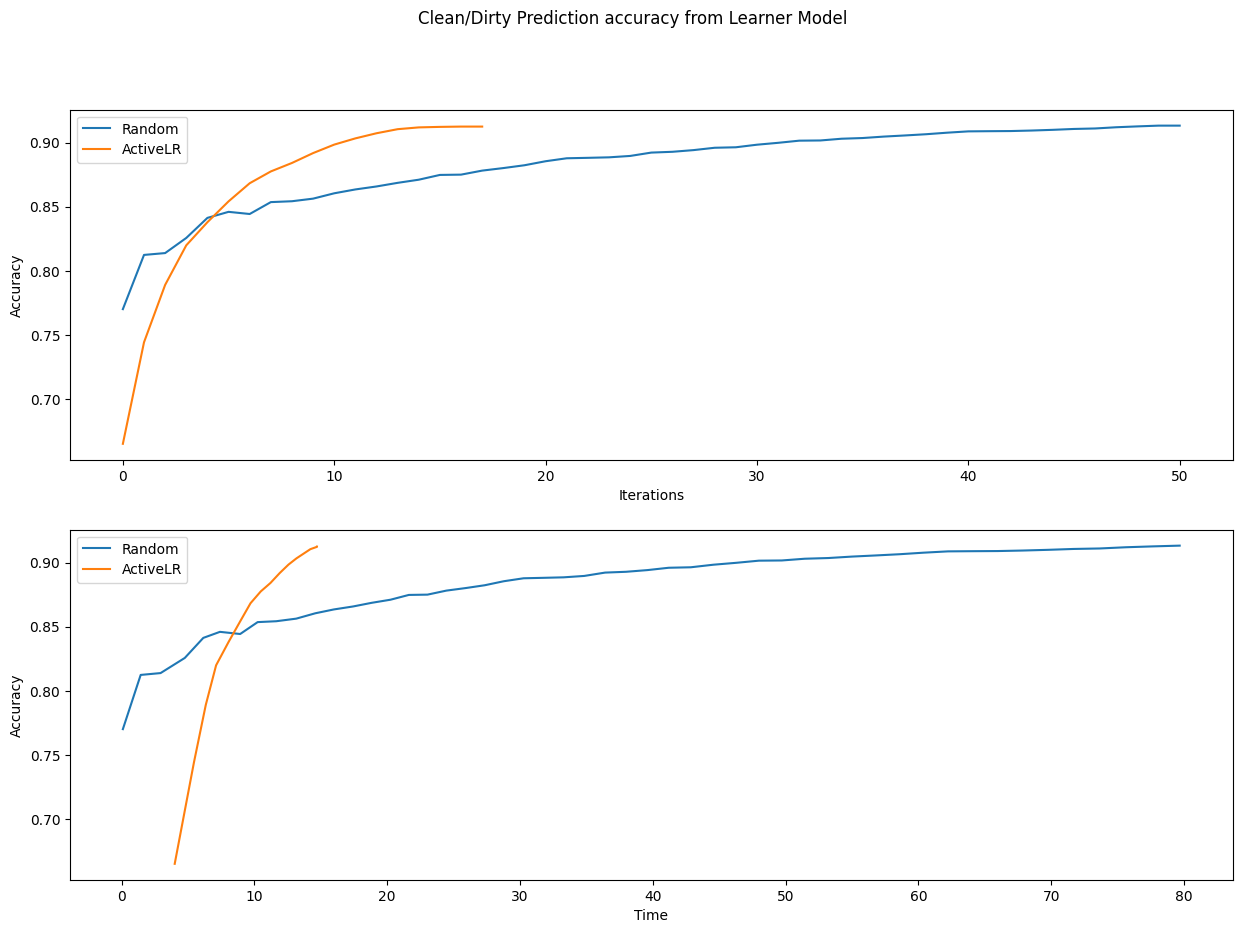

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(average_dict['Random'][2], label='Random')
plt.plot(average_dict['ActiveLR'][2], label='ActiveLR')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(average_dict['Random'][1], average_dict['Random'][2], label='Random')
plt.plot(average_dict['ActiveLR'][1], average_dict['ActiveLR'][2], label='ActiveLR')
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.suptitle("Clean/Dirty Prediction accuracy from Learner Model")
plt.legend()
plt.show()